In [1]:
import pandas as pd
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [5]:
df.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
df.shape

(48, 5)

In [11]:
print(df.describe().round(2))


       Petrol_tax  Average_income  Paved_Highways  \
count       48.00           48.00           48.00   
mean         7.67         4241.83         5565.42   
std          0.95          573.62         3491.51   
min          5.00         3063.00          431.00   
25%          7.00         3739.00         3110.25   
50%          7.50         4298.00         4735.50   
75%          8.12         4578.75         7156.00   
max         10.00         5342.00        17782.00   

       Population_Driver_licence(%)  Petrol_Consumption  
count                         48.00               48.00  
mean                           0.57              576.77  
std                            0.06              111.89  
min                            0.45              344.00  
25%                            0.53              509.50  
50%                            0.56              568.50  
75%                            0.60              632.75  
max                            0.72              968.00  


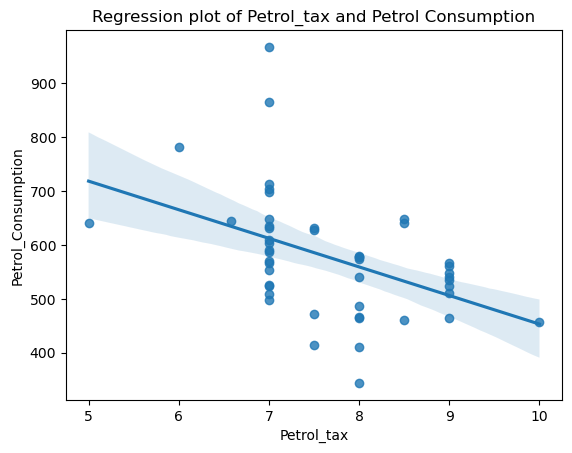

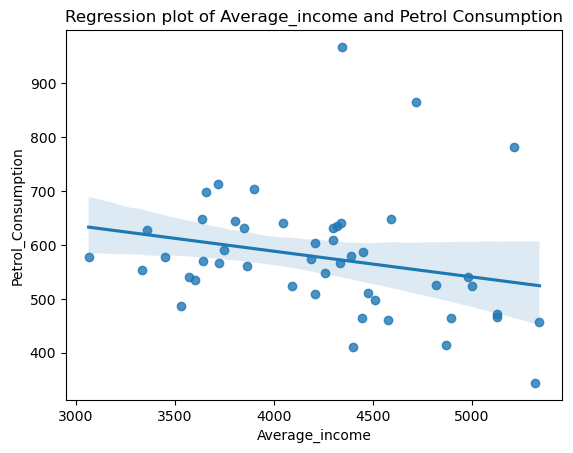

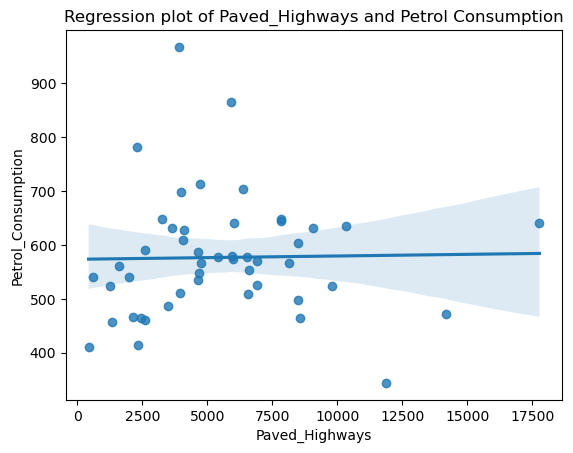

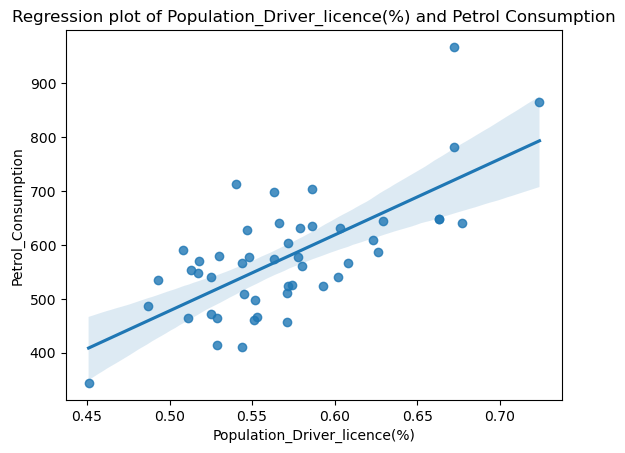

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

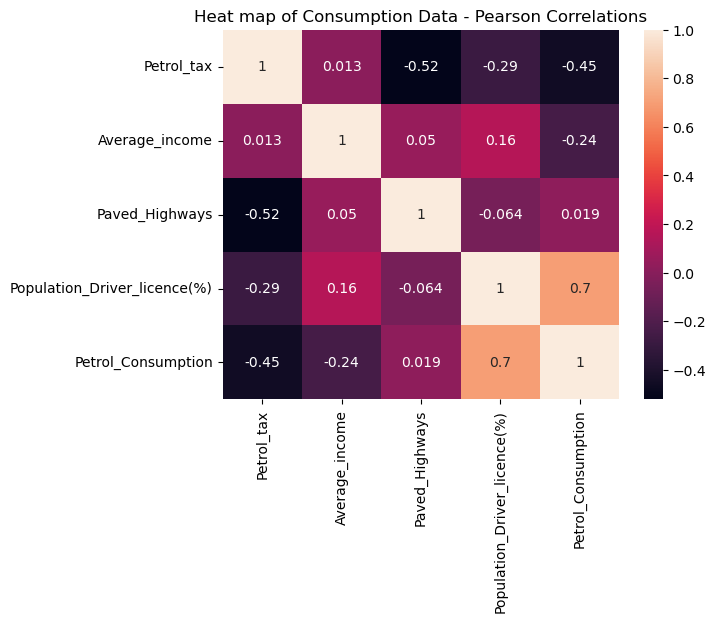

In [17]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heat map of Consumption Data - Pearson Correlations');

In [23]:
from sklearn.model_selection import train_test_split

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [25]:
X.shape 

(48, 4)

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
regressor.intercept_

304.10849843423244

In [33]:
regressor.coef_

array([-7.06365026e-02, -5.26725816e-05,  1.40755885e+03, -2.92398703e+01])

In [37]:
feature_names = X.columns
feature_names

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [39]:
y_pred = regressor.predict(X_test)

In [41]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
8      464  500.215868
42     632  644.258968
12     525  566.747133
16     603  607.007801
19     640  701.537323
34     487  506.281025
36     640  667.926180
9      498  557.241907
32     577  667.055309
41     699  633.428086


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 41.78
Mean squared error: 2407.85
Root mean squared error: 49.07


In [49]:
regressor.score(X_test, y_test)

0.5725804504531573